<a href="https://colab.research.google.com/github/rajat-chn/GRIP_May_2021/blob/main/T1_Linear_Regression(Supervised_learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Getting the required libraries
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
## getting most important thing i.e fuel for the lerning engine.

url=r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(url)

In [4]:
print(df)
print(df.columns)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86
Index(['Hours', 'Scores'], dtype='object')


Text(0, 0.5, 'Scores')

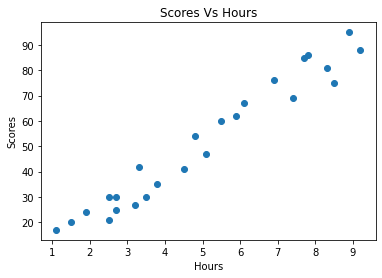

In [5]:
plt.scatter(df['Hours'],df['Scores'])
plt.title("Scores Vs Hours")
plt.xlabel("Hours")
plt.ylabel("Scores")

In [6]:
## importing required libraries for pridiction model
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split as tts
from sklearn import metrics

In [7]:
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values

In [8]:
##Train test split

x_train,x_test,y_train,y_test=tts(x,y,test_size=0.25,random_state=0)

In [9]:
## Training the model

rgr = lr()
rgr.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

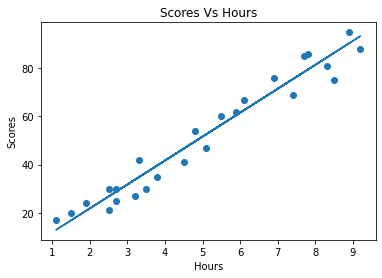

In [10]:
plt.scatter(df['Hours'],df['Scores'])
plt.title("Scores Vs Hours")
plt.xlabel("Hours")
plt.ylabel("Scores")

plt.plot(x,rgr.predict(x))
plt.show()

In [11]:
## Pridicting the values
y_pred=rgr.predict(x_test)
print("Real Value\tPredicted Value")
for i,j in zip(y_test,y_pred):
  print(i,"\t\t",j)

Real Value	Predicted Value
20 		 16.844721762383802
27 		 33.74557493951356
69 		 75.50062396536356
30 		 26.786400101871894
62 		 60.58810645613142
35 		 39.710581943206414
24 		 20.821393098179037


In [12]:
## Model Evaluation

print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.130879918502482


In [13]:
## Getting least Mean absolute Error by brute force method
mme=10
ts=0
rs=0
for i in range(1,101,1):
  c=0
  for j in range(0,101):
    try:
      x_train,x_test,y_train,y_test=tts(x,y,test_size=i/100,random_state=j)
      rgr = lr()
      rgr.fit(x_train,y_train)
      y_pred=rgr.predict(x_test)
      c=metrics.mean_absolute_error(y_test, y_pred)
      if c<=mme:
        ts=i
        rs=j
        mme=c
    except:
      pass
  
  

In [14]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=ts/100,random_state=rs)
rgr = lr()
rgr.fit(x_train,y_train)
y_pred=rgr.predict(x_test)
c=metrics.mean_absolute_error(y_test, y_pred)
print("minimum Mean Absolute Error",c)

minimum Mean Absolute Error 1.2125120090420936
